In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import datagen
import model as unet_model_script
import random
import matplotlib.pyplot as plt
import importlib
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
importlib.reload(datagen)
importlib.reload(unet_model_script)

<module 'model' from 'C:\\Users\\krcma\\Desktop\\tf_segmentation\\unet_segmentation\\model.py'>

# Image postprocessing

In [3]:
def get_everything(valid_HGG_patients):
    models = {}
    data = {}
    predictions = {}
    for tumor_region in range(1, 5):
        models[tumor_region] = keras.models.load_model("../models/unet_tumor_region_{}.h5".format(tumor_region))
        data[tumor_region] = {}
        data[tumor_region]["x"], data[tumor_region]["y"] = datagen.get_dataset(1, 
                                                            file_path='../dataset/', 
                                                            mode='validation', 
                                                            glioma_type=['HGG'], 
                                                            tumor_region=tumor_region,
                                                            randomize_slices=False,
                                                            slices_w_tumor_only=False,
                                                            slices_w_less_brain=None,
                                                            image_size=240,
                                                            train_HGG_patients=valid_HGG_patients)
        predictions[tumor_region] = models[tumor_region].predict(data[tumor_region]["x"])
    return models, data, predictions

In [4]:
models, data, predictions = get_everything(valid_HGG_patients=20)

validation data with shape: (20, 4, 240, 240) (20, 1, 240, 240)
validation data with shape: (20, 4, 240, 240) (20, 1, 240, 240)
validation data with shape: (20, 4, 240, 240) (20, 1, 240, 240)
validation data with shape: (20, 4, 240, 240) (20, 1, 240, 240)


In [24]:
x_o, y_o = datagen.get_dataset(20, 
                                file_path='../dataset/', 
                                mode='validation', 
                                glioma_type=['HGG'], 
                                tumor_region=-1,
                                randomize_slices=False,
                                slices_w_tumor_only=False,
                                slices_w_less_brain=None,
                                image_size=240,
                                train_HGG_patients=20)

validation data with shape: (400, 4, 240, 240) (400, 1, 240, 240)


In [25]:
p1 = models[1].predict(x_o)

In [26]:
p2 = models[2].predict(x_o)

In [27]:
p3 = models[3].predict(x_o)

In [28]:
p4 = models[4].predict(x_o)

In [12]:
mm = create_mask(p1[0], p2[0], p3[0], p4[0])

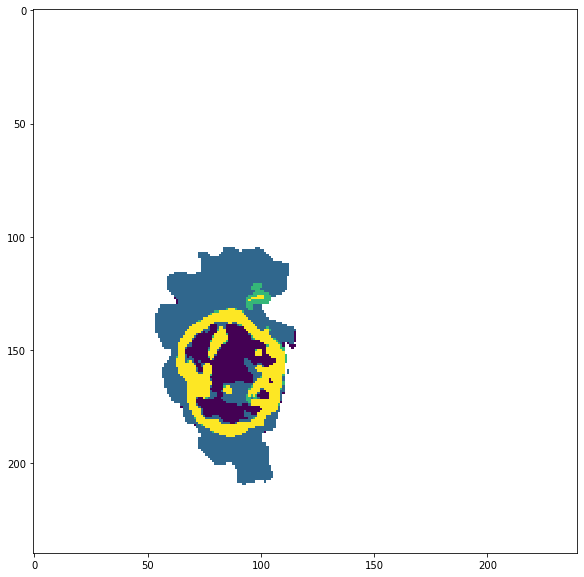

In [13]:
plt.figure(figsize=(10, 10))
img = mm[0]
img[img == 0] = np.nan
plt.imshow(img) 
plt.show()  # display it

In [11]:
def create_mask(m1, m2, m3, m4):
    final_mask = np.zeros((1, 240,240))
    final_mask[m1 >= 0.5] = 1
    final_mask[m2 >= 0.5] = 2
    final_mask[m3 >= 0.5] = 3
    final_mask[m4 >= 0.5] = 4
    return final_mask

248
[0. 1. 2. 3. 4.]
[0. 1. 2. 4.]


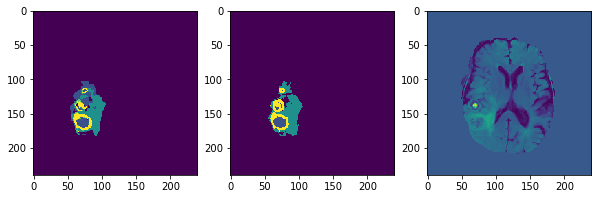

In [94]:
i = random.randint(0, 399)
print(i)
# i = 18

# Get mask
pred_final_mask = create_mask(p1[i], p2[i], p3[i], p4[i])

print(np.unique(gt_final_mask[0]))
print(np.unique(y_o[i][0]))

# Plot
f, axarr = plt.subplots(1,3, figsize=(10,10))
axarr[0].imshow(pred_final_mask[0])
axarr[1].imshow(y_o[i][0])
axarr[2].imshow(x_o[i][0])

-- min, max chyba, std, mean pre kazdeho pacienta
-- skusit hybat prah 0.5 na 0.45 0.55
-- vyhodnotit: base, base + dropout(0.5), base + dropout(0.2), 
-- skusit uzavriet regiony a porovnat chyby
-- postprocessing -- uzatvara diery v segmentacii. Da sa to d obinaru, zoberie sa vonkajsia kontura.. (openCV

In [ ]:
print("accuracy: ", np.mean(keras.metrics.accuracy(y_o[18][0], pred_final_mask)))
print("binary accuracy: ", np.mean(keras.metrics.binary_accuracy(y_o[18][0], pred_final_mask)))
print("categorical accuracy: ", np.mean(keras.metrics.categorical_accuracy(y_o[18][0], pred_final_mask)))

In [ ]:
print("accuracy: ", keras.metrics.accuracy(y_o[18], pred_final_mask))
print("binary accuracy: ", keras.metrics.binary_accuracy(y_o[18], pred_final_mask))
print("categorical accuracy: ", keras.metrics.categorical_accuracy(y_o[18], pred_final_mask))

-- spravne vyfarbit jednotlive kategorie + pridat legendu, aby bolo jasne vidno co kam patri
-- zvyraznit hustotu tkaniva 

-- vyhodnotit pomocou cisel hlavne
-- pridat vizualizacie, aby sa lahsie vysvetlovali vystupy,